# INF1032 - Trabalho 1.1 - Análise discritiva de dados de PG
### Alunos: Leonardo Wajnsztok e Samuel Bastos

## INICIALIZAÇÃO DOS DATASETS

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np  # numpy: numerical analysis

docentesRaw  = pd.read_csv('2018-05-02/docentes.csv')
discentesRaw = pd.read_csv('2018-05-02/discentes.csv')
producaoRaw  = pd.read_csv('2018-05-02/producao.csv')
trabalhosRaw = pd.read_csv('2018-05-02/trabalhos.csv')
docentes  = docentesRaw
discentes = discentesRaw
producao  = producaoRaw 
trabalhos = trabalhosRaw
#docentes.head()

## 1) Quantos professores (docentes) havia em cada programa em 2017,  em cada quadro (permanente, colaborador, visitante)? 

In [6]:
docentes_copy = docentes 
# é necessario mudar pra fazer o inner join
docentes_copy.columns = ['categoria', 'ies', 'orientador', 'prof_id']
dd = pd.merge(docentes_copy, discentes, how='inner', on='orientador')
# agora é necessário remover tuplas com 'Orientador' duplicado
dd_1_ndupl = dd.drop_duplicates(subset='orientador')
dd_1 = dd_1_ndupl.groupby(['programa', 'categoria']).size()
display(dd_1)

programa                                                          categoria  
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                              COLABORADOR     4
                                                                  PERMANENTE     34
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                              COLABORADOR     6
                                                                  PERMANENTE     41
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                              PERMANENTE     23
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)  COLABORADOR     6
                                                                  PERMANENTE     63
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                             COLABORADOR    14
                                                                  PERMANENTE     68
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                             COLABORADOR     5
                                                                  PERMANENTE     4

## 2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

programa
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                244
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                352
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                228
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    492
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               716
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               463
COMPUTAÇÃO(31003010046P4)                                           282
COMPUTAÇÃO(42001013004P4)                                           319
INFORMÁTICA(31001017110P8)                                          173
INFORMÁTICA(31005012004P9)                                          217
dtype: int64

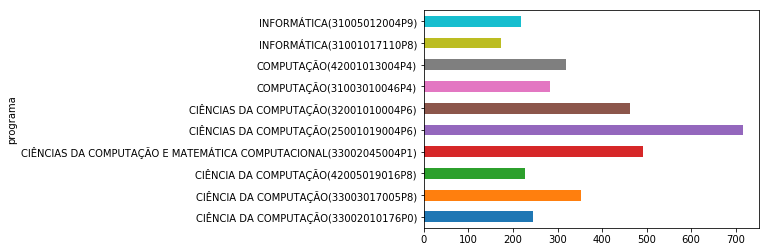

In [15]:
discente_aux = discentes.loc[discentes['nivel'] != 'Graduação', discentes.columns]
discentes_programa = discente_aux.groupby('programa').size()
display(discentes_programa)
# Mudar o plot (?)
discentes_programa.plot(kind='barh', stacked=False)

## 3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

In [23]:
import numpy as np

programs = ['CIÊNCIA DA COMPUTAÇÃO(33002010176P0)', 'CIÊNCIA DA COMPUTAÇÃO(33003017005P8)', 'CIÊNCIA DA COMPUTAÇÃO(42005019016P8)'
           ,'CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)', 'CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)', 'CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)'
           , 'COMPUTAÇÃO(31003010046P4)', 'COMPUTAÇÃO(42001013004P4)', 'INFORMÁTICA(31001017110P8)', 'INFORMÁTICA(31005012004P9)']

dd_aux = dd_1_ndupl.loc[dd_1_ndupl['categoria'] == 'PERMANENTE', dd.columns]
prof = dd_aux.groupby(['programa']).size()
alunos = discentes_programa
profAlu = pd.Series()

for program in programs:
    profAlu[program] = alunos[program]/prof[program]
    
profAlu

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                 7.176471
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                 8.585366
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                 9.913043
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               10.529412
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                                9.851064
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)     7.809524
COMPUTAÇÃO(31003010046P4)                                            7.230769
COMPUTAÇÃO(42001013004P4)                                            6.134615
INFORMÁTICA(31001017110P8)                                           6.653846
INFORMÁTICA(31005012004P9)                                           9.434783
dtype: float64

## 4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

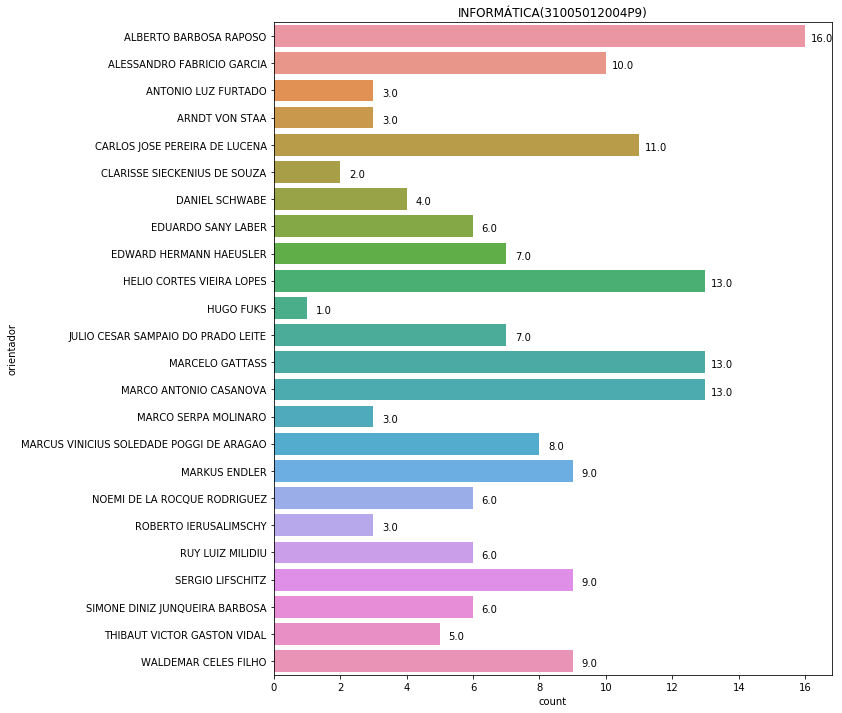

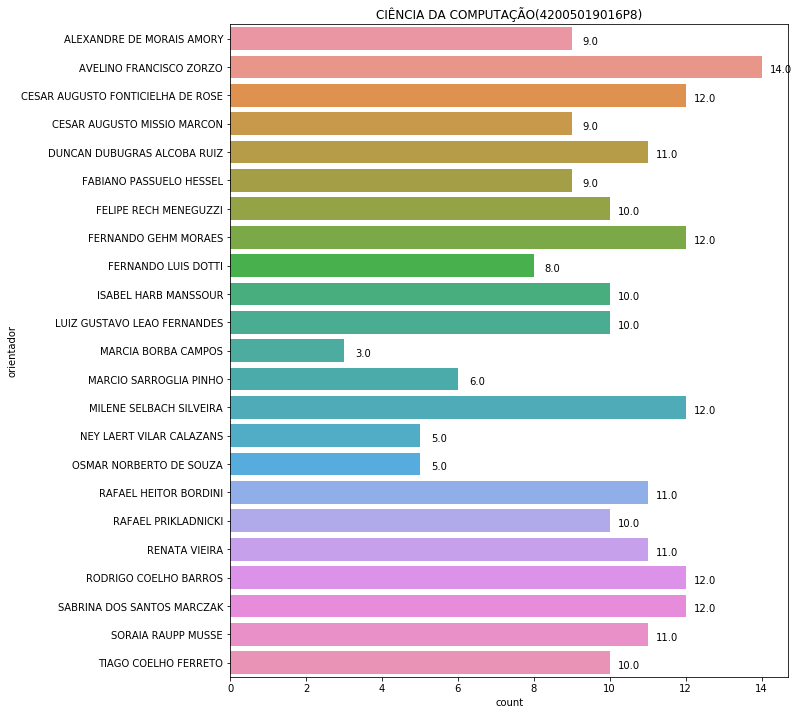

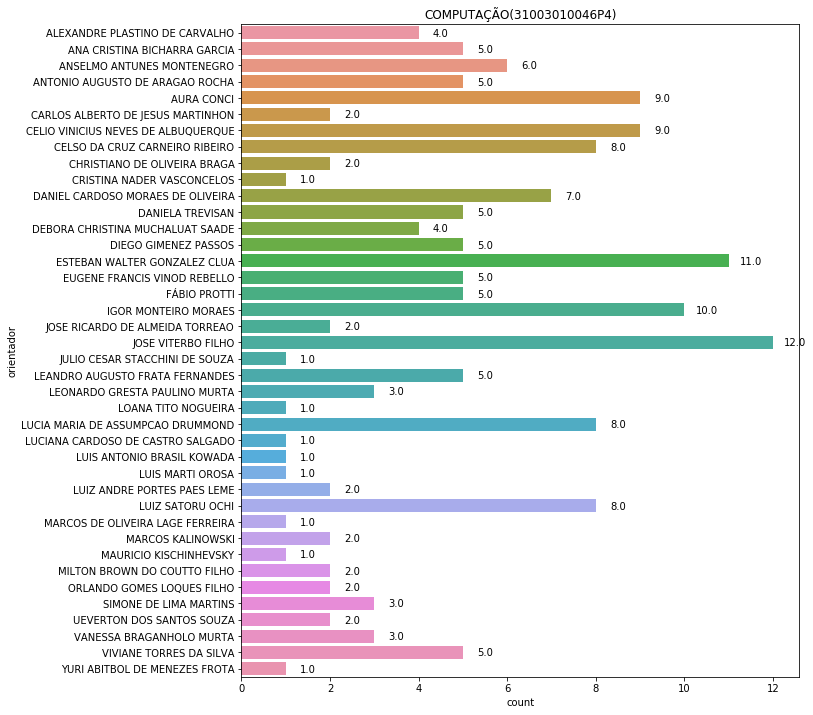

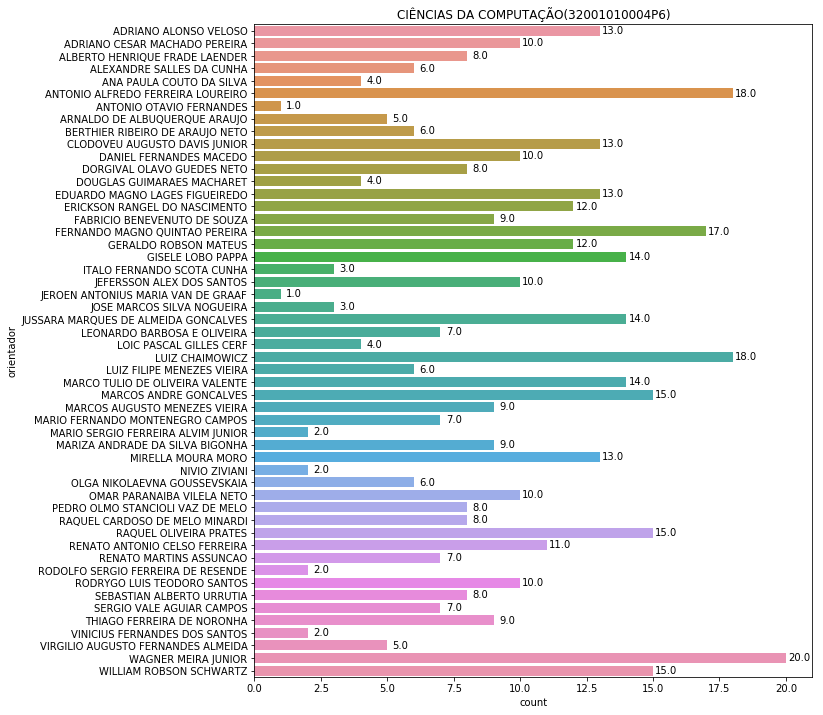

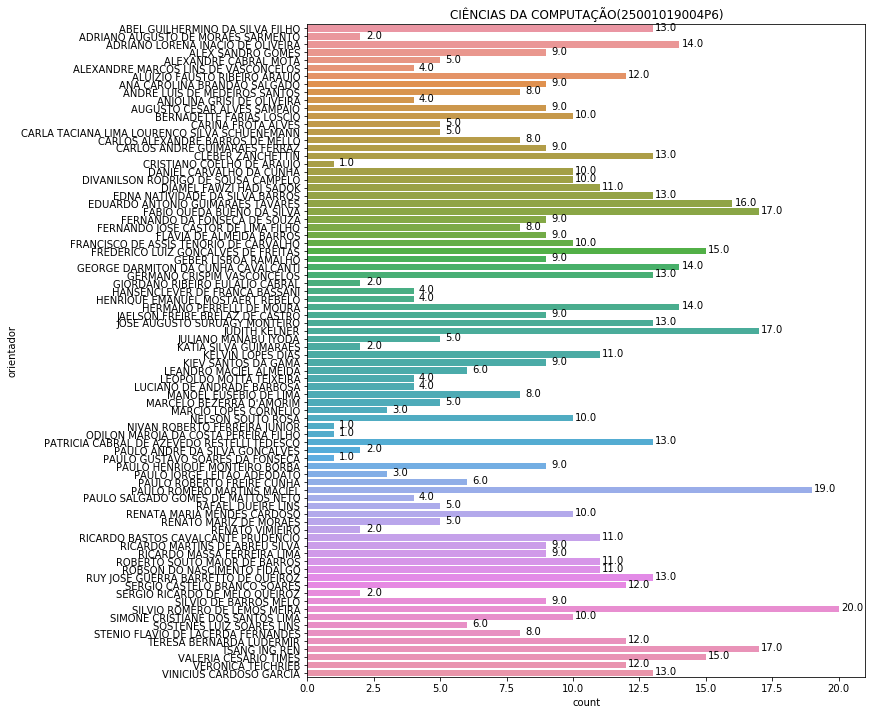

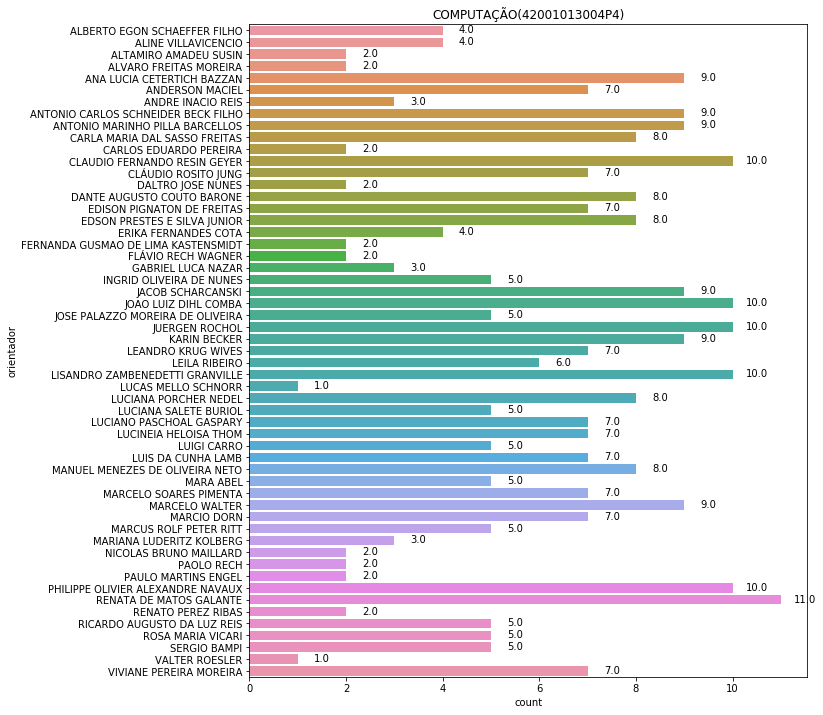

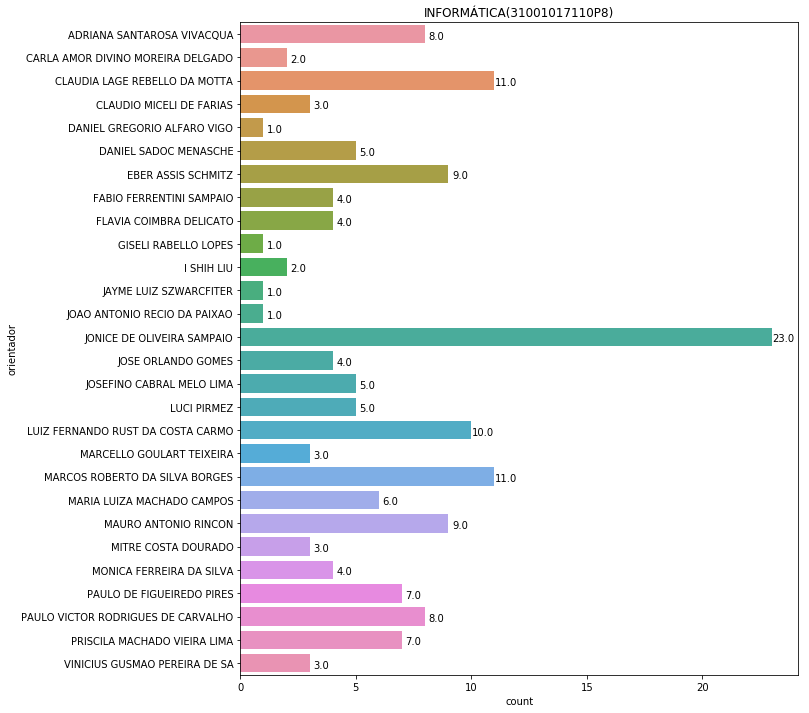

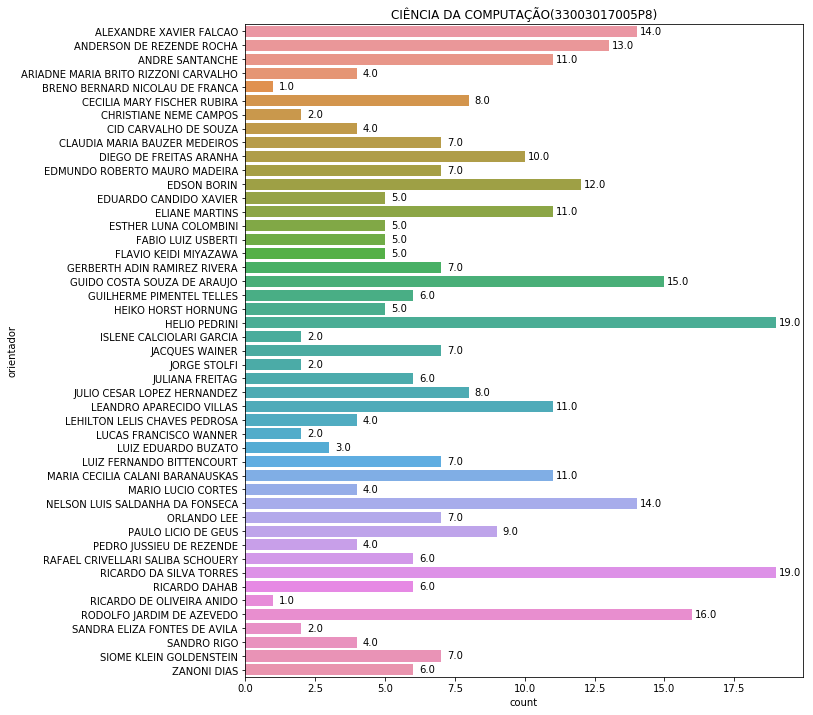

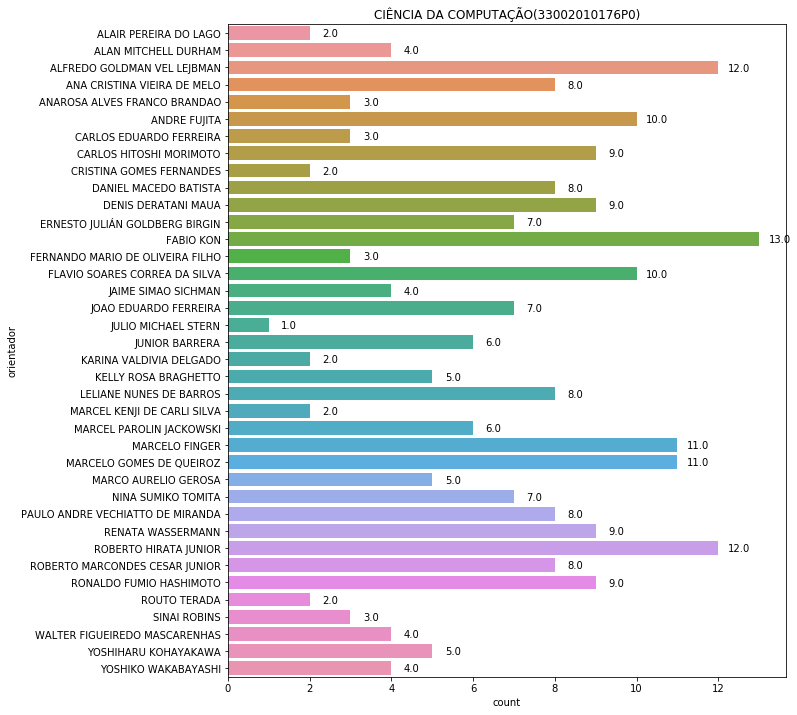

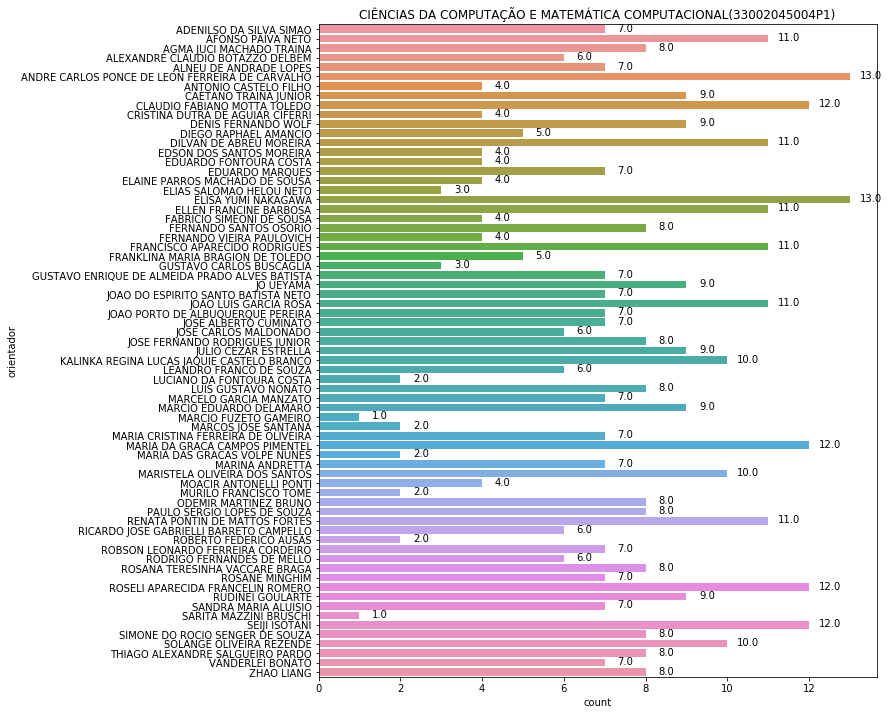

In [68]:
import seaborn as sns

def plot_bar_result(x, y, title=''):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 12)
    ax = sns.barplot(x=x, y=y, ax=ax)
    ax.set_title(title)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5  ,
                p.get_y()+p.get_height()/2. + 0.2,
                '{}'.format(width),
                ha="center")

aluno_prof = pd.merge(docentes, discentes, how='inner', on='orientador')
aluno_prof = aluno_prof[aluno_prof.nivel != 'Graduação']
aluno_prof_dist = aluno_prof.groupby(['programa', 'orientador']).size().reset_index(name='count')

for p in aluno_prof.programa.unique():
    aluno_prof_dist_programa = aluno_prof_dist[aluno_prof_dist.programa == p]
    plot_bar_result(aluno_prof_dist_programa['count'], aluno_prof_dist_programa.orientador, title=p)

## 5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

In [8]:
# precisa filtrar os nulos (verificar nas outras questões também se é necessário)
trabalhos = trabalhos[trabalhos.abstract.isnull() == False]
trabalhos = trabalhos[trabalhos.area != '-']
trabalhos.shape

(590, 20)

## 6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

In [251]:
# Fazer gráfico (?)
#trabalhos.tipo.unique()
#trabalhos.area.unique()
# Precisa fazer groupby por programa também (?)
trabalhos_areas = trabalhos.groupby(['programa','area']).size()
display(trabalhos_areas)

programa                                                           area                                              
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                              CIÊNCIA DA COMPUTAÇÃO                                 52
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                              ENGENHARIA DA INFORMAÇÃO                              22
                                                                   SISTEMAS DE COMPUTAÇÃO                                14
                                                                   TEORIA DA COMPUTAÇÃO                                   4
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                              CIÊNCIA DA COMPUTAÇÃO                                 44
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                             ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS        3
                                                                   BANCO DE DADOS                                         8
              

## 7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

In [9]:
trabalhos.data_defesa = pd.to_datetime(trabalhos.data_defesa)
# Necessário ordenar por data para possuir uma distribuição correta ao longo do tempo
trabalhos_sort = trabalhos.sort_values(by='data_defesa')
trabalhos_sort.head()
#trabalhos_sort.describe()

tsJan = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-01-01') & (trabalhos_sort['data_defesa'] <= '2017-02-01')]
tsFev = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-02-01') & (trabalhos_sort['data_defesa'] <= '2017-03-01')]
tsMar = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-03-01') & (trabalhos_sort['data_defesa'] <= '2017-04-01')]
tsAbr = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-04-01') & (trabalhos_sort['data_defesa'] <= '2017-05-01')]
tsMai = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-05-01') & (trabalhos_sort['data_defesa'] <= '2017-06-01')]
tsJun = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-06-01') & (trabalhos_sort['data_defesa'] <= '2017-07-01')]
tsJul = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-07-01') & (trabalhos_sort['data_defesa'] <= '2017-08-01')]
tsAgo = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-08-01') & (trabalhos_sort['data_defesa'] <= '2017-09-01')]
tsSet = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-09-01') & (trabalhos_sort['data_defesa'] <= '2017-10-01')]
tsOut = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-10-01') & (trabalhos_sort['data_defesa'] <= '2017-11-01')]
tsNov = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-11-01') & (trabalhos_sort['data_defesa'] <= '2017-12-01')]
tsDez = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-12-01') & (trabalhos_sort['data_defesa'] <= '2018-01-01')]

# fazer plot meses x quantidade

## 8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

In [253]:
# muda coluna nome para autor para inner join, discente_aux já removeu 'Graduação'
discente_aux.rename(columns={'nome':'autor'}, inplace=True)
dt = pd.merge(discente_aux, trabalhos_sort, how='inner', on='autor')
discentes.shape # discentes = 4049 rows (total de discentes)
dt.shape        # dt = 680 rows (total que defendeu em todos os programas)

dt_programa = dt.groupby('programa_y').size()
dt_programa/4049*100

programa_y
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                1.407755
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                1.284268
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                1.210175
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               3.457644
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               2.420351
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    1.877007
COMPUTAÇÃO (31003010046P4)                                           1.457150
COMPUTAÇÃO (42001013004P4)                                           1.926402
INFORMÁTICA (31001017110P8)                                          0.691529
INFORMÁTICA (31005012004P9)                                          1.061991
dtype: float64

## 9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

In [254]:
producao.head()
types = ['ARTIGO EM PERIÓDICO', 'TRABALHO EM ANAIS']
producao_pa = producao[producao.subtipo.isin(types)]
producao_pa_prog = producao_pa.groupby('programa').size()
display(producao_pa_prog)

programa
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                156
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                240
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                183
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               309
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               316
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    370
COMPUTAÇÃO (31003010046P4)                                           193
COMPUTAÇÃO (42001013004P4)                                           229
INFORMÁTICA (31001017110P8)                                          122
INFORMÁTICA (31005012004P9)                                          137
dtype: int64

## 10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

In [255]:
dd_1_ndupl_perma = dd_1_ndupl.loc[dd_1_ndupl['categoria'] == 'PERMANENTE', dd_1_ndupl.columns]
perma = dd_1_ndupl_perma.groupby(['programa']).size()
perma

rate = pd.Series()
rate['CIÊNCIA DA COMPUTAÇÃO (33002010176P0)'] = producao_pa_prog['CIÊNCIA DA COMPUTAÇÃO (33002010176P0)'] / perma['CIÊNCIA DA COMPUTAÇÃO(33002010176P0)']
rate['CIÊNCIA DA COMPUTAÇÃO (33003017005P8)'] = producao_pa_prog['CIÊNCIA DA COMPUTAÇÃO (33003017005P8)'] / perma['CIÊNCIA DA COMPUTAÇÃO(33003017005P8)']
rate['CIÊNCIA DA COMPUTAÇÃO (42005019016P8)'] = producao_pa_prog['CIÊNCIA DA COMPUTAÇÃO (42005019016P8)'] / perma['CIÊNCIA DA COMPUTAÇÃO(42005019016P8)']
rate['CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)'] = producao_pa_prog['CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)'] / perma['CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)']
rate['CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)'] = producao_pa_prog['CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)'] / perma['CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)']
rate['CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)'] = producao_pa_prog['CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)'] / perma['CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)']
rate['COMPUTAÇÃO (31003010046P4)'] = producao_pa_prog['COMPUTAÇÃO (31003010046P4)'] / perma['COMPUTAÇÃO(31003010046P4)']
rate['COMPUTAÇÃO (42001013004P4)'] = producao_pa_prog['COMPUTAÇÃO (42001013004P4)'] / perma['COMPUTAÇÃO(42001013004P4)']
rate['INFORMÁTICA (31001017110P8)'] = producao_pa_prog['INFORMÁTICA (31001017110P8)'] / perma['INFORMÁTICA(31001017110P8)']
rate['INFORMÁTICA (31005012004P9)'] = producao_pa_prog['INFORMÁTICA (31005012004P9)'] / perma['INFORMÁTICA(31005012004P9)']
rate

CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                4.588235
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                5.853659
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                7.956522
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               4.544118
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               6.723404
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    5.873016
COMPUTAÇÃO (31003010046P4)                                           4.948718
COMPUTAÇÃO (42001013004P4)                                           4.403846
INFORMÁTICA (31001017110P8)                                          4.692308
INFORMÁTICA (31005012004P9)                                          5.956522
dtype: float64

## 11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

In [256]:
# 'num_discentes', 'num_docentes', 'num_externos'
# 2255 (total) -> 1416 (com discentes)
producao_pa_disc = producao_pa.loc[producao_pa['num_discentes'] != 0, producao_pa.columns]
producao_pa_disc.shape
print(1416/2255)

0.6279379157427938


## 12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

In [257]:
# 2255 (total) -> 1731 (com externos)
producao_pa_ext = producao_pa.loc[producao_pa['num_externos'] != 0, producao_pa.columns]
producao_pa_ext.shape
print(1731/2255)

0.7676274944567627


## 13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

In [258]:
qualisRaw  = pd.read_excel('C:/Users/Sam/Downloads/t1ds/2018-05-02/Qualis-CC-2013-2016.xlsx')
qualis = qualisRaw
#qualis_estrato = qualis.groupby('Estrato').size()
#display(qualis_estrato)

producao_artigo = producao.loc[producao['subtipo'] == 'ARTIGO EM PERIÓDICO', producao.columns]
producao_artigo.rename(columns={'issn':'ISSN'}, inplace=True)

pq = pd.merge(producao_artigo, qualis, how='inner', on='ISSN')
pq_estrato = pq.groupby('Estrato').size()
display(pq_estrato)

Estrato
A1    185
A2    163
B1    152
B2     30
B3     78
B4     12
B5     36
C      23
dtype: int64

## 14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}),  qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [348]:
# perma -> possui numero de docentes permanentes de cada PROGRAMA

restrictTypes = ['A1', 'A2', 'B1']
programs = ['CIÊNCIA DA COMPUTAÇÃO (33002010176P0)', 'CIÊNCIA DA COMPUTAÇÃO (33003017005P8)', 'CIÊNCIA DA COMPUTAÇÃO (42005019016P8)'
           ,'CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)', 'CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)', 'CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)'
           , 'COMPUTAÇÃO (31003010046P4)', 'COMPUTAÇÃO (42001013004P4)', 'INFORMÁTICA (31001017110P8)', 'INFORMÁTICA (31005012004P9)']

pq_restrict = pq[pq.Estrato.isin(restrictTypes)]
pq_restrict_pe = pq_restrict.groupby(['programa','Estrato']).size()
pq_restrict_pe
relative = pd.Series()

for program in programs:
    relative[program] = 0.0
    

for program in programs:
    for type in restrictTypes:
        if type not in pq_restrict_pe[program].index:
            continue
        if type == 'A1':
            relative[program] += pq_restrict_pe[program][type] * 1.0
        elif type == 'A2':
            relative[program] += pq_restrict_pe[program][type] * 0.85
        else:
            relative[program] += pq_restrict_pe[program][type] * 0.70

i=0
while i < 10:
    #print('Relative: ' + str(relative[i]) + ' Perma: ' + str(perma[i]))
    relative[i] /= perma[i]
    i+=1

relative.sort_values(ascending=False, inplace=True)
relative

CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    1.387234
INFORMÁTICA (31005012004P9)                                          1.304348
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                1.302439
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                1.150000
COMPUTAÇÃO (42001013004P4)                                           1.096154
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               0.960317
COMPUTAÇÃO (31003010046P4)                                           0.923077
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                0.842647
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               0.777941
INFORMÁTICA (31001017110P8)                                          0.763462
dtype: float64

## 15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [349]:


generalTypes = ['A1', 'A2', 'B1', 'B2', 'B3', 'B4', 'B5', 'C']
pq_general = pq[pq.Estrato.isin(generalTypes)]
pq_general_pe = pq_general.groupby(['programa','Estrato']).size()
pq_general_pe

relative = pd.Series()

for program in programs:
    relative[program] = 0.0
    
for program in programs:
    for type in generalTypes:
        if type not in pq_general_pe[program].index:
            continue
        if type == 'A1':
            relative[program] += pq_general_pe[program][type] * 1.0
        elif type == 'A2':
            relative[program] += pq_general_pe[program][type] * 0.85
        elif type == 'B1':
            relative[program] += pq_general_pe[program][type] * 0.70
        elif type == 'B2':
            relative[program] += pq_general_pe[program][type] * 0.50
        elif type == 'B3':
            relative[program] += pq_general_pe[program][type] * 0.20   
        elif type == 'B4':
            relative[program] += pq_general_pe[program][type] * 0.10
        elif type == 'B5':
            relative[program] += pq_general_pe[program][type] * 0.05
        else:
            relative[program] += 0.0
            
i=0
while i < 10:
    #print('Relative: ' + str(relative[i]) + ' Perma: ' + str(perma[i]))
    relative[i] /= perma[i]
    i+=1

relative.sort_values(ascending=False, inplace=True)
relative

CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    1.568085
INFORMÁTICA (31005012004P9)                                          1.415217
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                1.382927
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                1.226087
COMPUTAÇÃO (42001013004P4)                                           1.112500
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               1.034127
COMPUTAÇÃO (31003010046P4)                                           0.984615
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                0.948529
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               0.845588
INFORMÁTICA (31001017110P8)                                          0.817308
dtype: float64